High Density Regions can be used to find cross sections across a multi-dimensional space that have the highest concentrations of data points. It can also be used to compute the average value of an aggregate statistic with respect to a target variable.

In [1]:
import matplotlib.pyplot as plt

In [2]:
#the package uses numba compile funtions, it may take a few seconds to load
import choclo_hdre
import numpy as np
import pandas as pd

In [3]:
from sklearn import datasets,mixture

def generate_MoG_data(num_data, means, covariances, weights):
    """ Creates a list of data points """
    num_clusters = len(weights)
    data = []
    k = np.random.choice(len(weights), num_data, p=weights)
    for i in range(len(weights)):
        cnt = np.sum(k==i)
        x = np.random.multivariate_normal(means[i], covariances[i],size=cnt)
        data.append(x)
    return data


def plt_two_dev_clust():
    for k in range(3):
        i,j=0,1
        w1 = init_means[k][i]
        w2 = init_means[k][j]

        k_cov = np.array(init_covariances[k])
        C = np.array([[k_cov[i,i],k_cov[i,j]],[k_cov[j,i],k_cov[j,j]]])

        eVa, eVe = np.linalg.eig(C)
        R, S = eVe, np.diag(np.sqrt(eVa))

        C = np.array([[k_cov[i,i],k_cov[i,j]],[k_cov[j,i],k_cov[j,j]]])

        eVa, eVe = np.linalg.eig(C)
        R, S = eVe, np.diag(np.sqrt(eVa))
        #create circle (points)
        z = np.linspace(0,2*np.pi,100)

        points = np.array([[np.sin(z[i]),np.cos(z[i])] for i in range(z.shape[0]-1)])
        points = np.concatenate([points,points[:1]])

        #1 std away
        T = (S*2).dot(R.T)
        points = points.dot(T)
        points[:,0] = points[:,0]+w1
        points[:,1] = points[:,1]+w2
        plt.plot(points[:,0],points[:,1],color='#17C350')


init_means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 5]  # mean of cluster 3
]

init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.92, .38], [.38, .91]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
init_weights = [1/4., 1/2., 1/4.]  # weights of each cluster

X = np.vstack(generate_MoG_data(5000, init_means, init_covariances, init_weights))

In [4]:
"""
HierarchicalDensityFactorization parameters:

number_of_clusters: The number of clusters
bins_per_dimension: The number of histogram bins across each dimensions. This is used for estimating the kernel density function
smoothing_parameter: Increases the bandwidth of the kernel density estimation
min_leaf_samples: Prunes clusters than have less than the minimum number of samples
alpha: Discount factor, 0<alpha<1

"""

'\nHierarchicalDensityFactorization parameters:\n\nnumber_of_clusters: The number of clusters\nbins_per_dimension: The number of histogram bins across each dimensions. This is used for estimating the kernel density function\nsmoothing_parameter: Increases the bandwidth of the kernel density estimation\nmin_leaf_samples: Prunes clusters than have less than the minimum number of samples\nalpha: Discount factor, 0<alpha<1\n\n'

In [84]:
hdf =  choclo_hdre.region_estimator.HierarchicalDensityFactorization(num_clusters=16,
                                                                 bins_per_dimension=61,
                                                                 smoothing_parameter=1.,
                                                                 min_leaf_samples=1,
                                                                 alpha=0.5)

hdf.optimize(X, maxiter=12, realizations=10, number_of_random_simulations=200, verbose=True)

realization 0 loss 11.21208705026041 time 2.703460216522217
realization 1 loss 6.276879196738864 time 2.9704997539520264
realization 2 loss 3.3711173358063613 time 2.321782112121582
realization 3 loss 2.479743799066775 time 2.9794578552246094
realization 4 loss 2.0141300815410204 time 2.4218437671661377
realization 5 loss 1.8597311164203476 time 2.723832368850708
realization 6 loss 1.7869791112954219 time 2.246769428253174
realization 7 loss 1.6351438469924777 time 1.9388422966003418
realization 8 loss 1.5971353838678592 time 1.9493916034698486
realization 9 loss 1.5646368093519858 time 2.197266101837158
1 clusters were not assigned data points

614 data points are unassigned
realization 0 loss 9.607738176761538 time 2.6199796199798584
realization 1 loss 7.218906721210177 time 2.695174217224121
realization 2 loss 4.892912026236345 time 2.9884471893310547
realization 3 loss 4.108326245261263 time 2.613858938217163
realization 4 loss 2.546465165625787 time 2.849353790283203
realization 5

In [86]:
"""
The plots below show clusters that were not close to the true distribution. 

These clusters are excluded if the number of data points is less than min_leaf_samples
"""

'\nThe plots below show clusters that were not close to the true distribution. \n\nThese clusters are excluded if the number of data points is less than min_leaf_samples\n'

In [87]:
import copy

In [88]:
save_hdf = copy.copy(hdf)

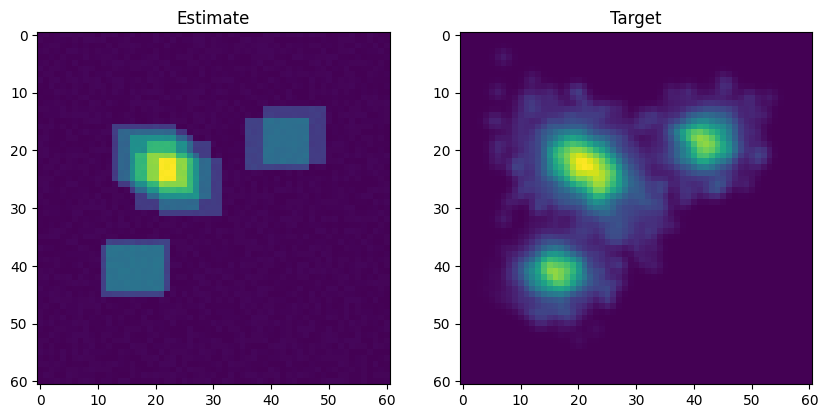

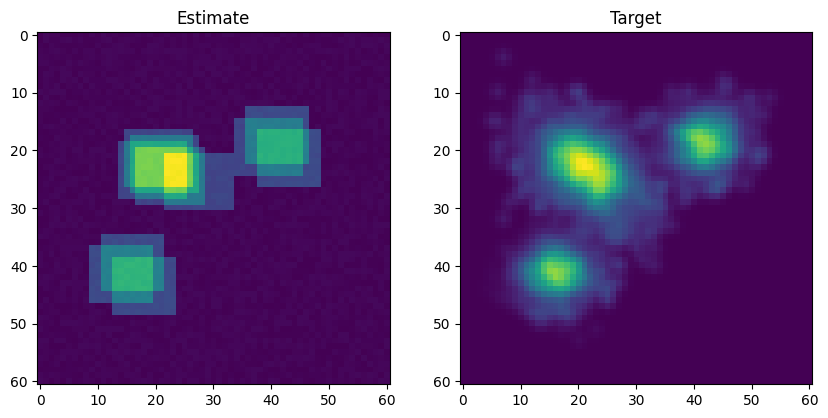

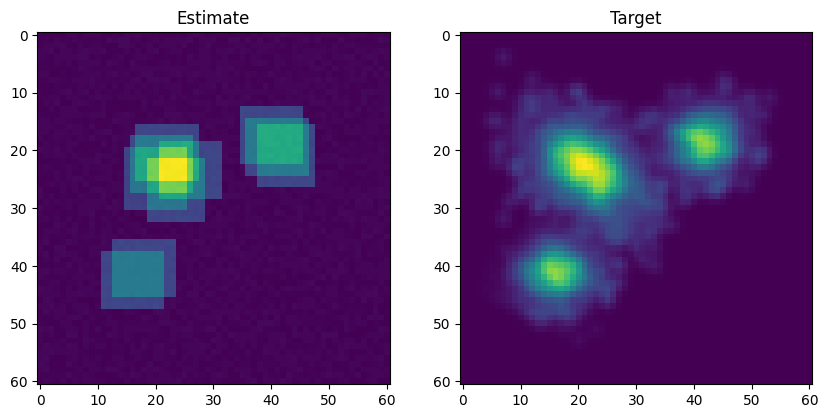

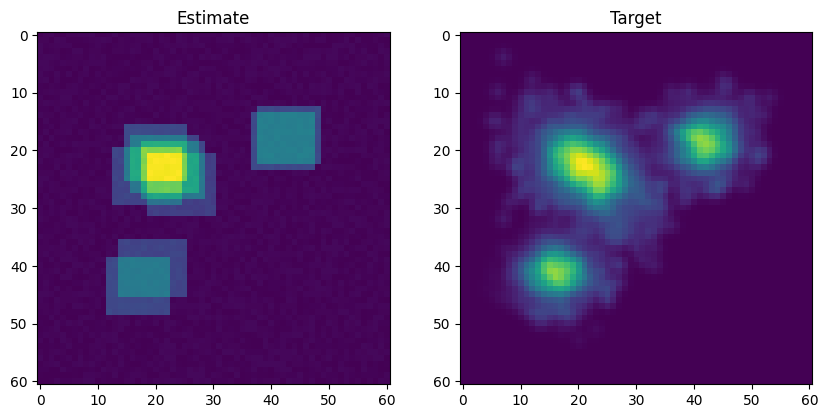

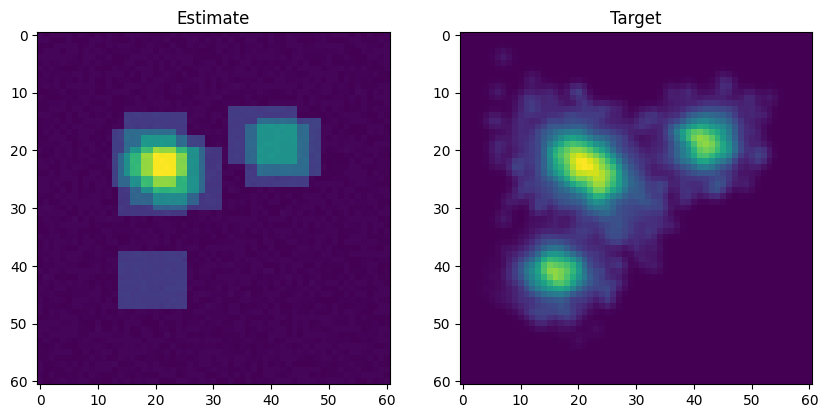

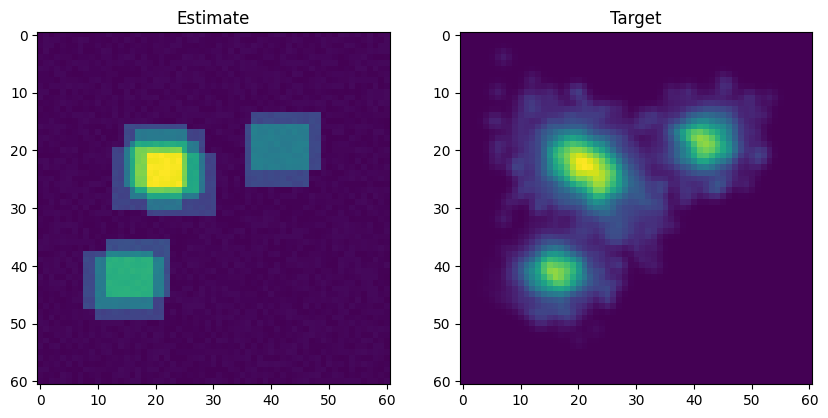

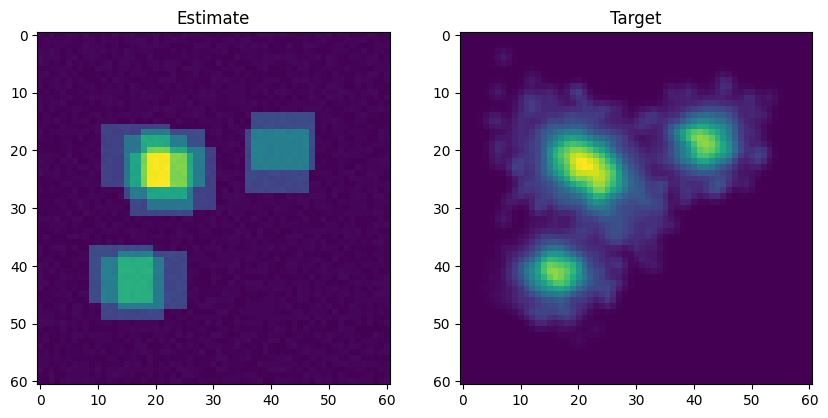

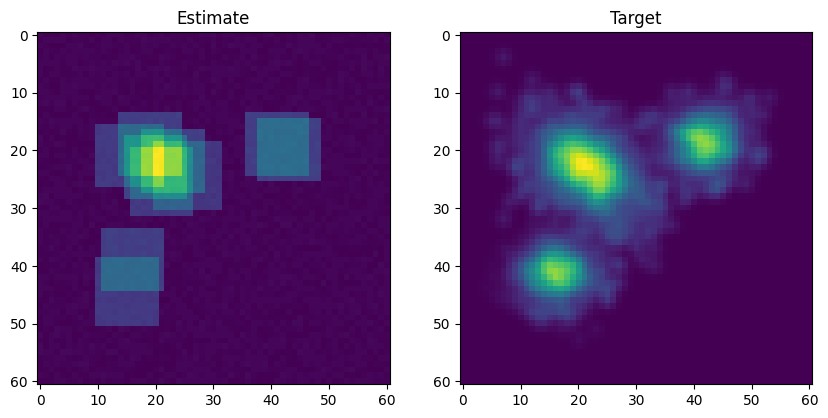

In [89]:
for model in save_hdf.models:

    model.prune_clusters(X, pad=0.2, limit=50)
    
    count=0
    for i,j in model.dim_combos:
        plt.figure(figsize=(10,10))
        plt.subplot(1,2,1)
        plt.imshow(model.kde_estimate[count])
        plt.title('Estimate')

        plt.subplot(1,2,2)
        plt.imshow(model.kde_target[count])
        plt.title('Target')
        plt.show()
        count+=1

In [95]:
#assignments
A = save_hdf.assign(X)
#density
D = np.sum(A,axis=1)

In [96]:
A.shape

(5000, 123)

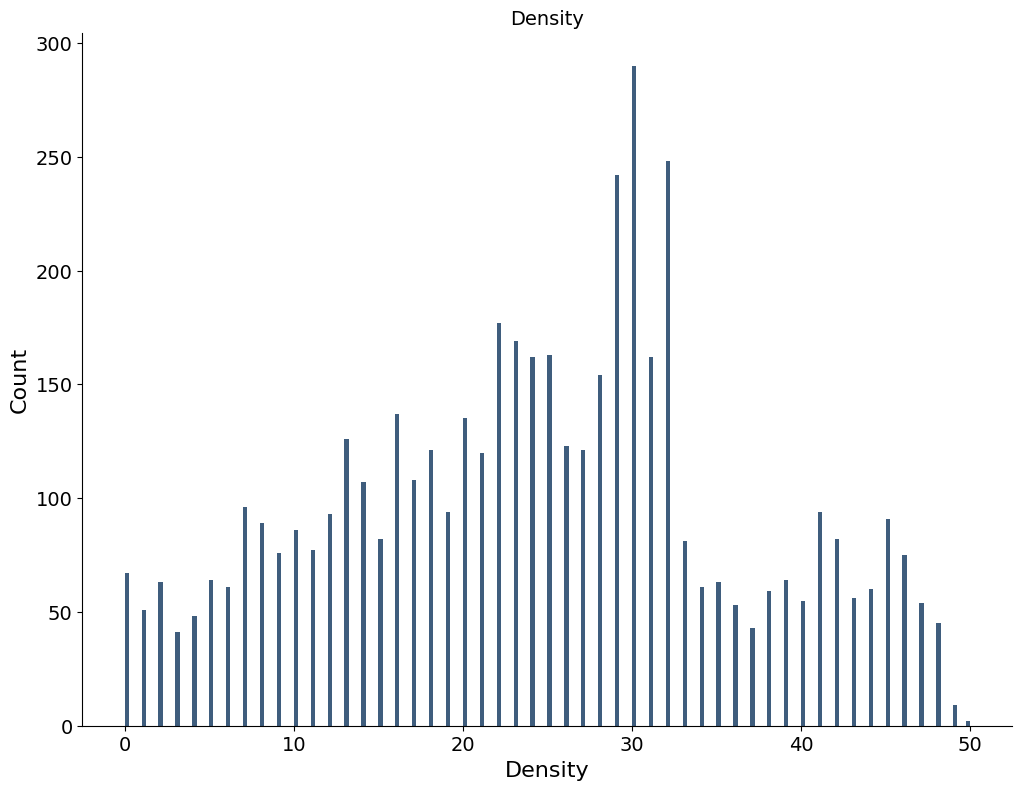

In [97]:

plt.figure(figsize=(12, 9))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
    
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title("Density", fontsize=14)  

plt.xlabel("Density", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

pkg = plt.hist(D,  
         color="#3F5D7D", bins=200)  

plt.show()

In [98]:
"""
Visualization of outliers
"""

'\nVisualization of outliers\n'

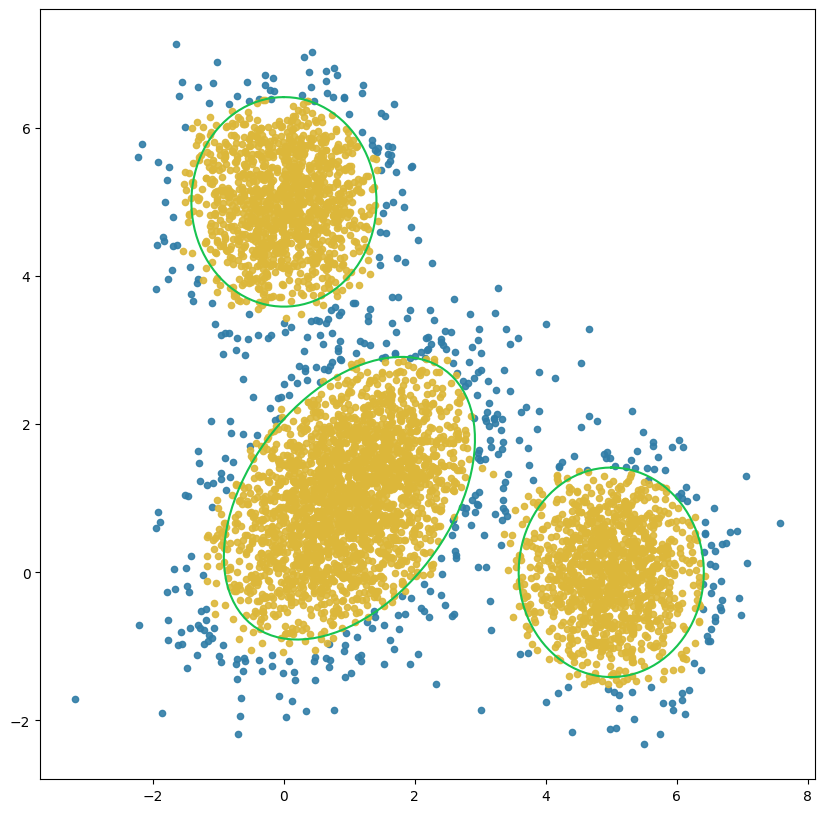

In [99]:
qry=int(np.percentile(D, 10))

cond = (D>=qry)


for i,j in save_hdf.model.dim_combos[:1]:
    plt.figure(figsize=(10,10))

    plt.plot(X[~cond, 0], X[~cond, 1],'.', color='#317DA7', markersize=9, alpha=0.9, label='0-95th percentile')
    plt.plot(X[cond, 0], X[cond, 1],'.', color='#DCB73A', markersize=9, alpha=0.9, label='95-100th percentile')
    
plt_two_dev_clust()

plt.show()



In [100]:

"""
A More Difficult Problem...

As the input space increases in dimensionality, the Euclidean space between data points increases.
For an input space that contain only uniform random variables, the space between space points increase by
a factor of sqrt(D), where D is the number of dimensions.

"""

init_means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [-5, 0]  # mean of cluster 3
]

init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.92, .38], [.38, .91]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
init_weights = [1/4., 1/2., 1/4.]  # weights of each cluster


Xtrain = np.vstack(generate_MoG_data(3000, init_means, init_covariances, init_weights))
Xtest = np.vstack(generate_MoG_data(500000, init_means, init_covariances, init_weights))

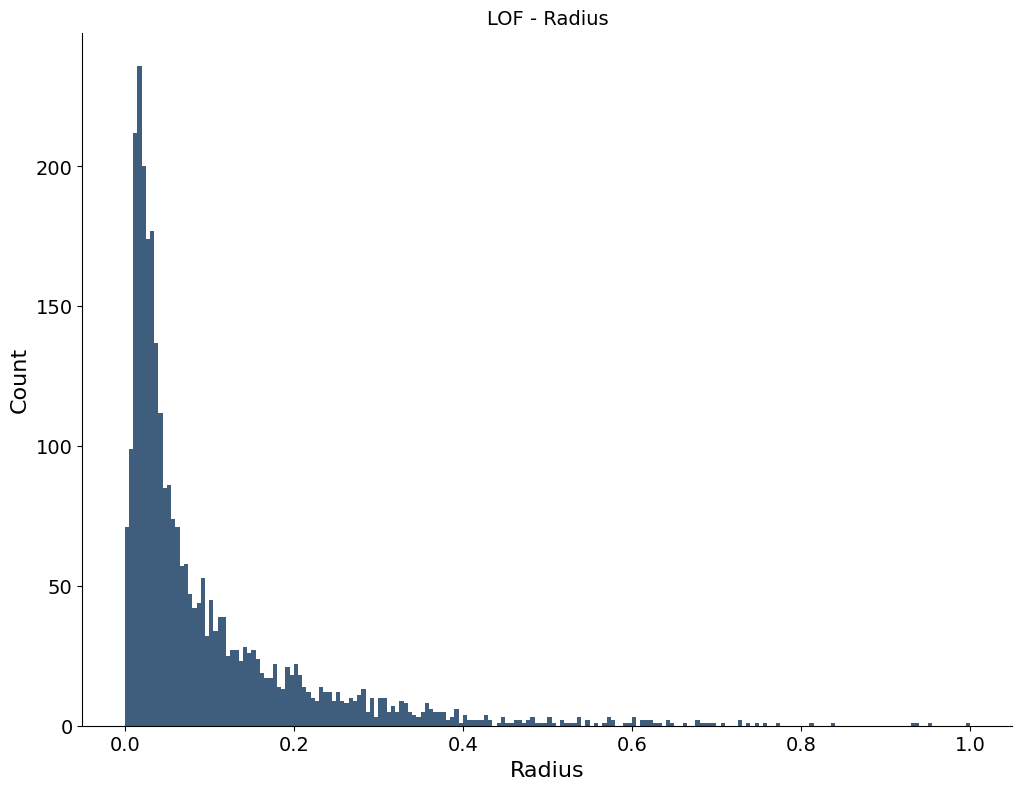

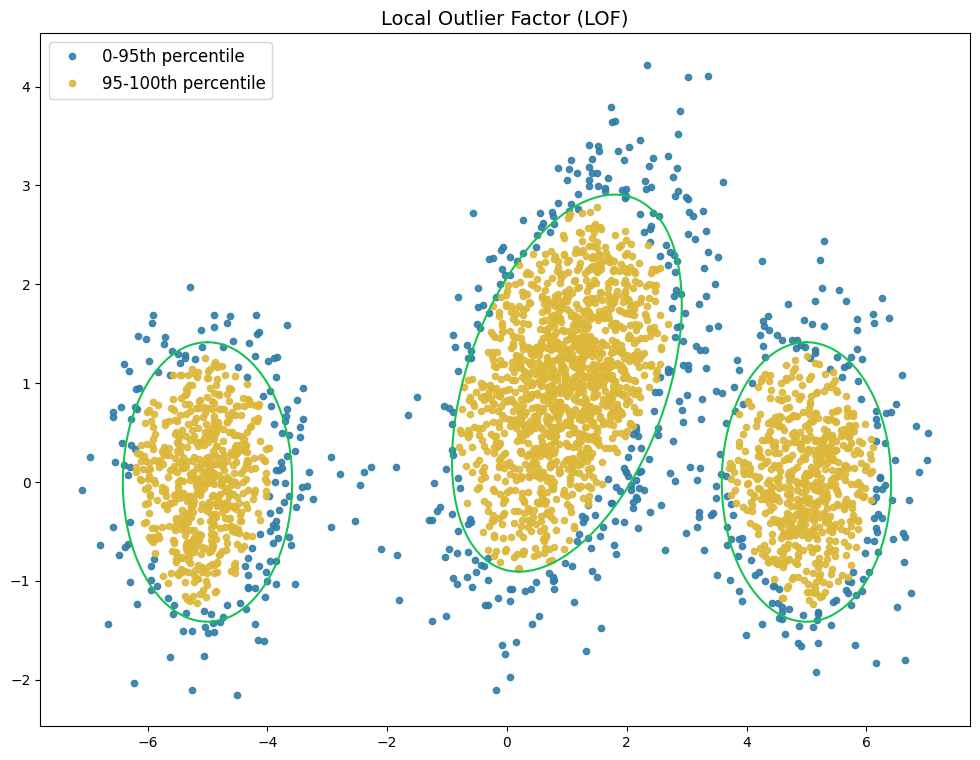

In [101]:

"""
Local Outlier Factor

The quality of the solution depends on the number of nearest neighbors and the contamination

"""

from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=100, contamination=0.2,novelty=True)
ypred = clf.fit(Xtrain).predict(Xtrain)
X_scores = clf.negative_outlier_factor_


radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
#while this provides some information on the level of density for each data point
#it is not availble when predicting on a new training dataset
# qry = np.percentile(radius,95)
# cond = radius>qry

plt.figure(figsize=(12, 9))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# plt.ylim(63, 85)  
    
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title("LOF - Radius", fontsize=14)  

plt.xlabel("Radius", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

pkg = plt.hist(radius,  
         color="#3F5D7D", bins=200)  

plt.show()


cond = ypred==1

plt.figure(figsize=(12,9))
plt.title("Local Outlier Factor (LOF)",fontsize=14)


plt.plot(Xtrain[~cond, 0], Xtrain[~cond, 1],'.', color='#317DA7', markersize=9, alpha=0.9, label='0-95th percentile')
plt.plot(Xtrain[cond, 0], Xtrain[cond, 1],'.', color='#DCB73A', markersize=9, alpha=0.9, label='95-100th percentile')


plt_two_dev_clust()

plt.axis('tight')
legend = plt.legend(loc='upper left', prop={'size': 12})
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

plt.show()

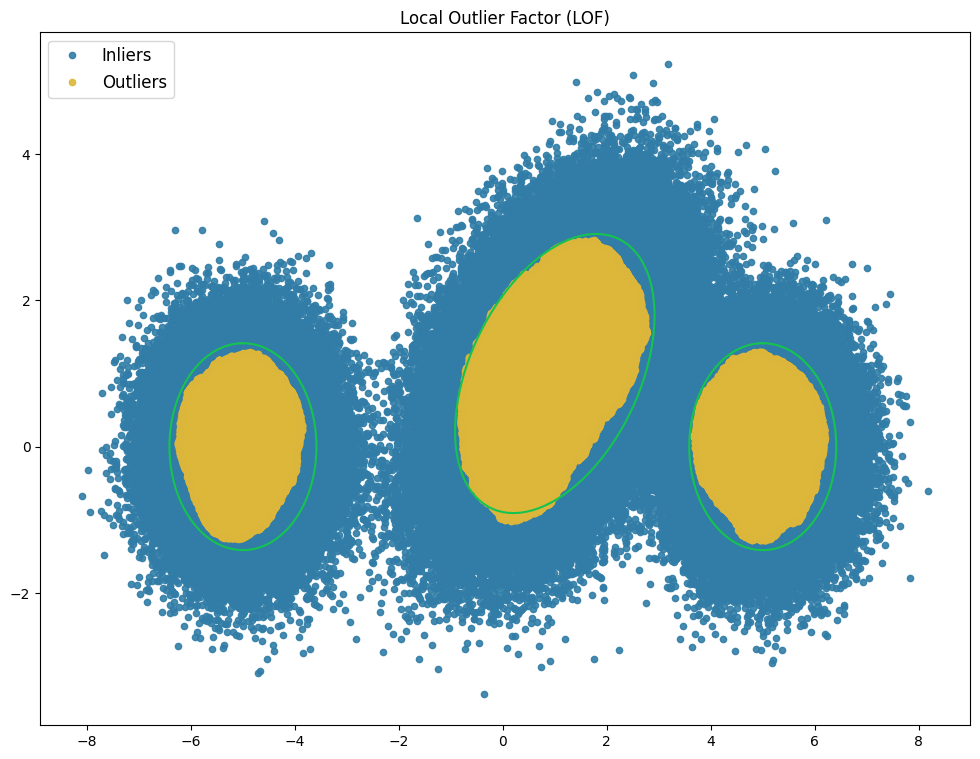

In [102]:
ypred = clf.predict(Xtest)

cond = ypred==1


plt.figure(figsize=(12,9))
plt.title("Local Outlier Factor (LOF)")


plt.plot(Xtest[~cond, 0], Xtest[~cond, 1], '.',color='#317DA7', markersize=9, alpha=0.9, label='Inliers')
plt.plot(Xtest[cond, 0], Xtest[cond, 1], '.', color='#DCB73A', markersize=9, alpha=0.9, label='Outliers')


plt_two_dev_clust()

plt.axis('tight')
legend = plt.legend(loc='upper left', prop={'size': 12})
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

plt.show()

In [103]:
"""
Compare with Hierarchical Density Factorization
"""

'\nCompare with Hierarchical Density Factorization\n'

In [111]:
hdf =  choclo_hdre.region_estimator.HierarchicalDensityFactorization(num_clusters=16,
                                                                 bins_per_dimension=61,
                                                                 smoothing_parameter=1.,
                                                                 min_leaf_samples=int(Xtrain.shape[0]*0.05),
                                                                 alpha=0.5)

hdf.optimize(Xtrain,maxiter=12,realizations=10,number_of_random_simulations=200,verbose=True)

realization 0 loss 8.194629877599613 time 4.023251056671143
realization 1 loss 5.0396498924404 time 3.375861644744873
realization 2 loss 3.344419695419796 time 2.406374931335449
realization 3 loss 2.5344541585642917 time 2.75972580909729
realization 4 loss 2.1911217152351687 time 2.129966974258423
realization 5 loss 2.212617002515842 time 2.4358110427856445
realization 6 loss 2.0288945668486402 time 2.569775104522705
realization 7 loss 2.0157143660516637 time 2.869870901107788
realization 8 loss 1.9382336066672463 time 3.1010689735412598
realization 9 loss 1.9294894869709982 time 2.905541181564331
2 clusters were not assigned data points

370 data points are unassigned
realization 0 loss 8.69105527130061 time 2.4599356651306152
realization 1 loss 5.724313961671872 time 2.4901981353759766
realization 2 loss 3.7346878104302763 time 2.6451170444488525
realization 3 loss 2.6453374134892127 time 2.461132287979126
realization 4 loss 1.9165851070468423 time 2.840430736541748
realization 5 los

In [113]:
save_hdf = copy.copy(hdf)

In [114]:
for model in save_hdf.models:

    model.prune_clusters(X, pad=0.2, limit=50)

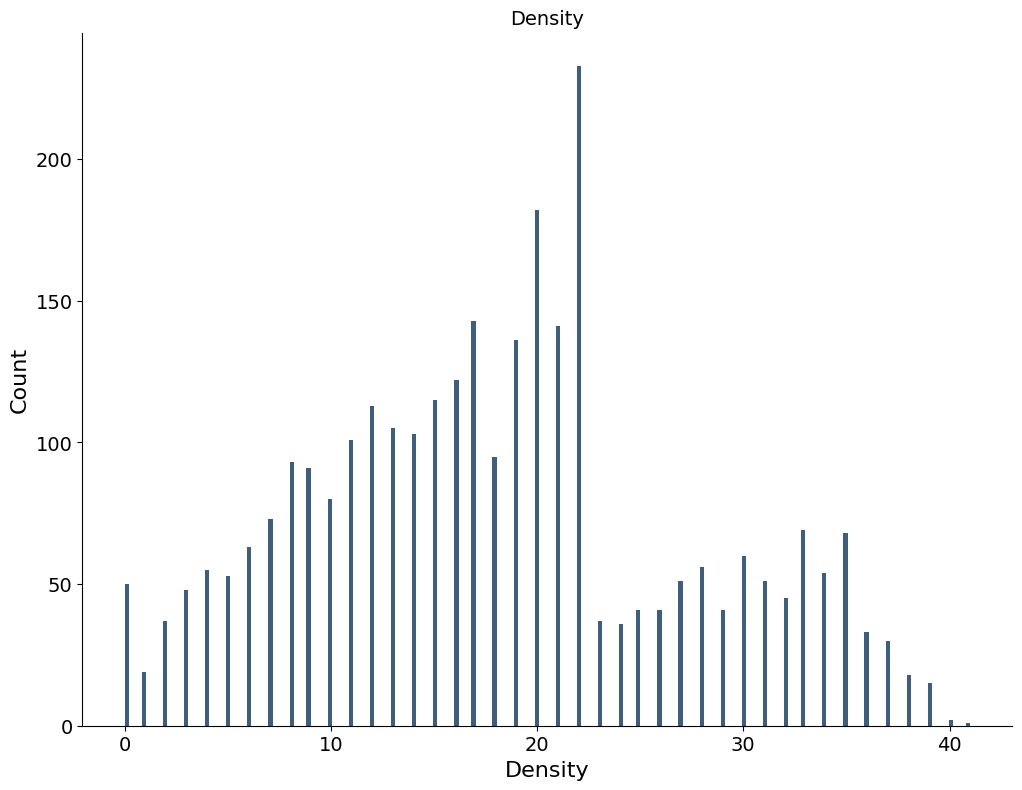

In [115]:
#assignments
A = save_hdf.assign(Xtrain)
#density
D = np.sum(A,axis=1)

plt.figure(figsize=(12, 9))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
    
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title("Density", fontsize=14)  

plt.xlabel("Density", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

pkg = plt.hist(D,  
         color="#3F5D7D", bins=200)  

plt.show()

In [116]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', len(np.unique(D)))
colors = np.linspace(0, 1, len(np.unique(D)))
colordict = dict(zip(np.unique(D), colors)) 
colormap = list(map(lambda x: colordict[x],D))

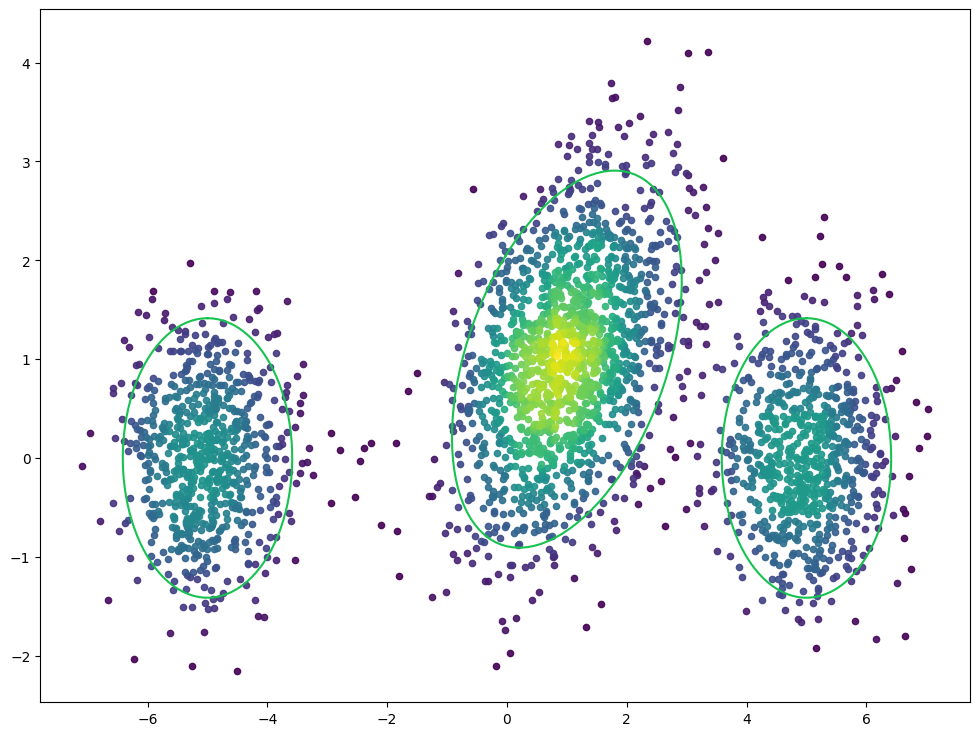

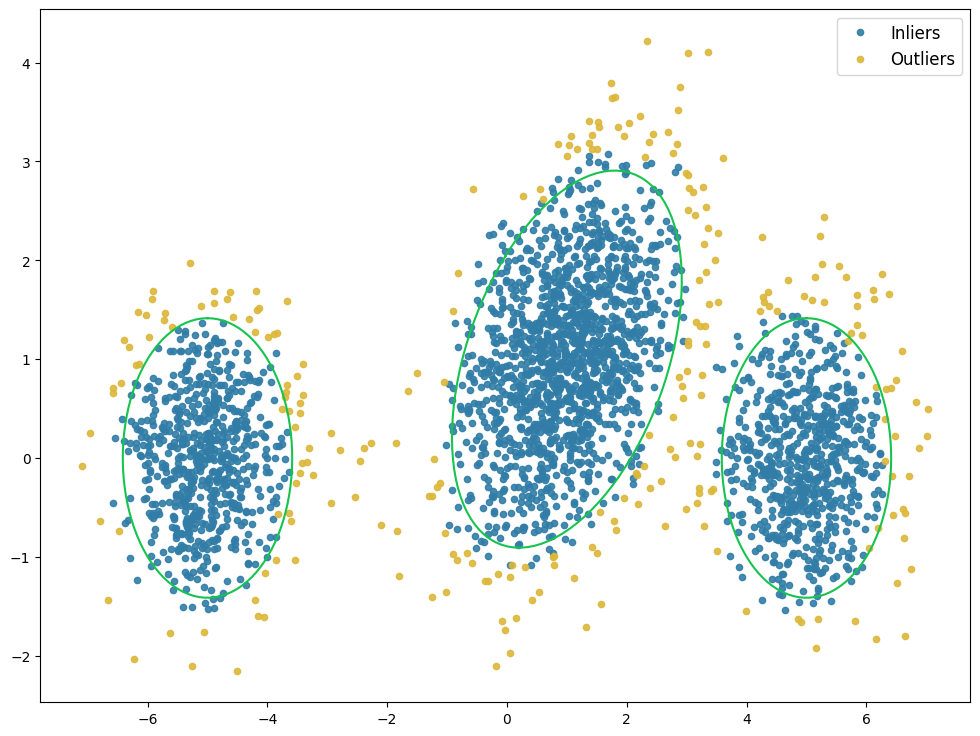

In [117]:
qry=int(np.percentile(D,10))
cond = (D>=qry)


plt.figure(figsize=(12,9))
for i,j in save_hdf.model.dim_combos[:1]:

    for c in colors:
        plt.plot(Xtrain[(colormap==c),i],Xtrain[(colormap==c),j],'.',c=viridis(c),alpha=0.9, markersize=9)

plt_two_dev_clust()
plt.show()

plt.figure(figsize=(12,9))    
for i,j in save_hdf.model.dim_combos[:1]:

    plt.plot(Xtrain[cond,i],Xtrain[cond,j],'.',color='#317DA7',alpha=0.9, markersize=9, label='Inliers')
    plt.plot(Xtrain[~cond,i],Xtrain[~cond,j],'.',color='#DCB73A',alpha=0.9, markersize=9, label='Outliers')
    
plt.legend( prop={'size': 12})
plt_two_dev_clust()
plt.show()




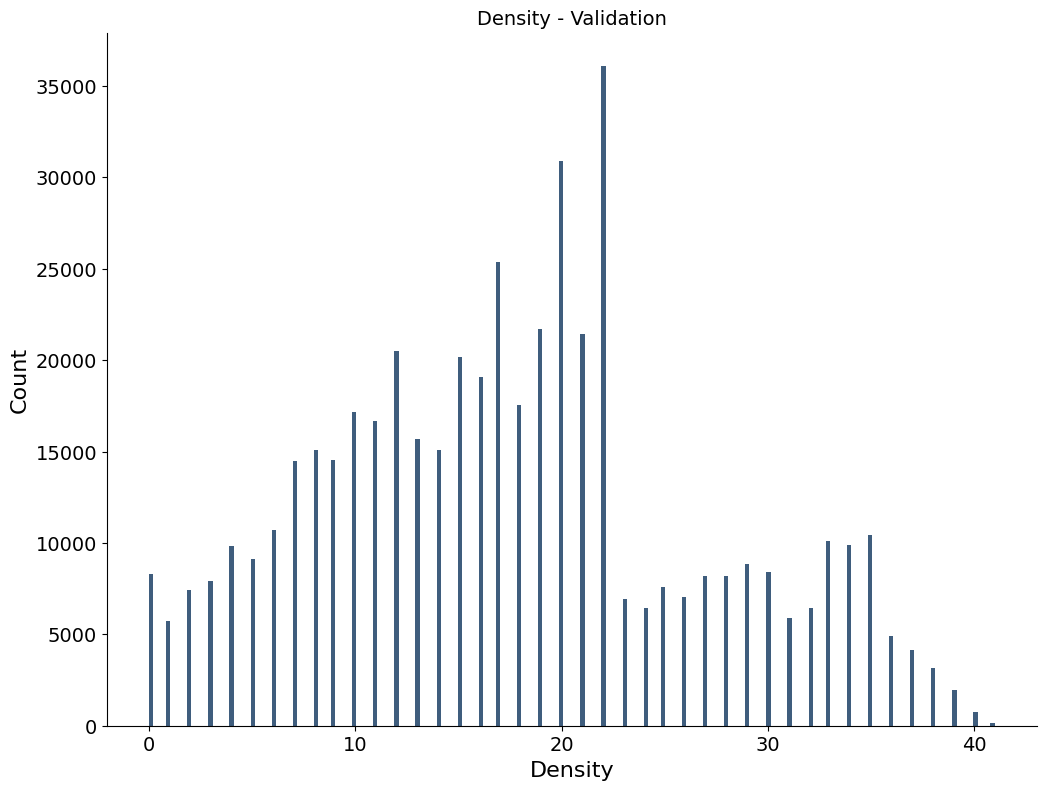

In [118]:
#assignments
A = save_hdf.assign(Xtest)
#density
D = np.sum(A,axis=1)

plt.figure(figsize=(12, 9))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# plt.ylim(63, 85)  
    
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.title("Density - Validation", fontsize=14)  

plt.xlabel("Density", fontsize=16)  
plt.ylabel("Count", fontsize=16)  

pkg = plt.hist(D,  
         color="#3F5D7D", bins=200)  

plt.show()

In [119]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', len(np.unique(D)))
colors = np.linspace(0, 1, len(np.unique(D)))
colordict = dict(zip(np.unique(D), colors)) 
colormap = list(map(lambda x: colordict[x],D))

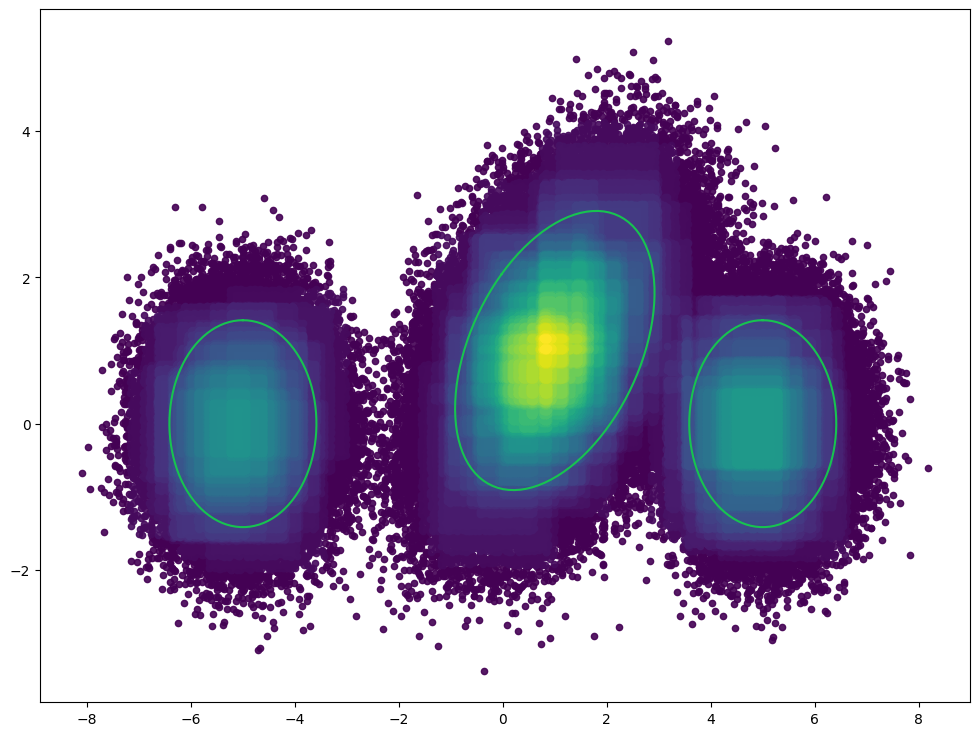

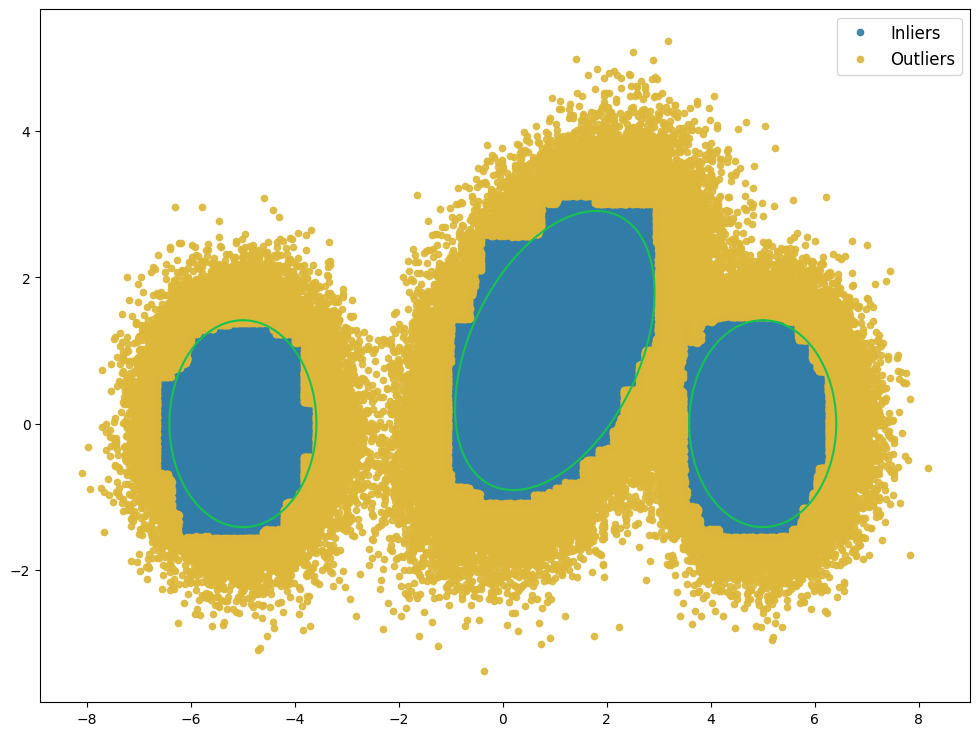

In [120]:
qry=int(np.percentile(D,10))
cond = (D>=qry)


plt.figure(figsize=(12,9))
for i,j in save_hdf.model.dim_combos[:1]:

    for c in colors:
        plt.plot(Xtest[(colormap==c),i],Xtest[(colormap==c),j],'.',c=viridis(c),alpha=0.9, markersize=9)

plt_two_dev_clust()
plt.show()

plt.figure(figsize=(12,9))    
for i,j in save_hdf.model.dim_combos[:1]:

    plt.plot(Xtest[cond,i],Xtest[cond,j],'.',color='#317DA7',alpha=0.9, markersize=9, label='Inliers')
    plt.plot(Xtest[~cond,i],Xtest[~cond,j],'.',color='#DCB73A',alpha=0.9, markersize=9, label='Outliers')
    
plt.legend(prop={'size':12})
plt_two_dev_clust()
plt.show()